# T-test assignment



**Your name (unique name)**: Miratess

**Your U-M ID**: 65730841

**BEFORE YOU START**:

Copy this template to your own drive and **OUTSIDE** of the course folder. Then, edit on your own copy. **DO NOT** edit this template file directly.

If you are using Google Colab to finish your assignment, make a copy to your own drive and edit.  If you are running on your own local machine and run into issues with packages like `ModuleNotFoundError`, you can install the `colab` extension in your own VSCode, and running with the colab kernel. It will require you to log in with your UMICH google account.


## Introduction

<center> <h3> Do spoken or written words better express intelligence? </h3></center>  
This assignment uses the open data from Experiment 4 of Schroeder and Epley (2015) to teach independent
samples <em>t</em>-tests. Results of the activity provided below should exactly reproduce the results described in the paper.

**CITATION**  
Schroeder, J., & Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a
job candidate’s appeal. Psychological Science, 26, 877-891.

**LEARNING OBJECTIVES**  
* Conduct independent samples t-tests with Python
* Interpret the t-test results in the context of the research question
* Generate a t-test figure with APA guidelines
* Review the use of Python functions and packages including `pandas`, `seaborn` and `matplotlib`

**STUDY DESCRIPTION**  
Imagine you were a job candidate trying to pitch your skills to a potential employer. Would you be more
likely to get the job after giving a short speech describing your skills, or after writing a short speech and
having a potential employer read those words? That was the question raised by Schroeder and Epley
(2015). The authors predicted that a person’s speech (i.e., vocal tone, cadence, and pitch) communicates
information about their intellect better than their written words (even if they are the same words as in
the speech).

To examine this possibility, the authors randomly assigned 39 professional recruiters for *Fortune 500*
companies to one of two conditions. In the audio condition, participants listened to audio recordings of a
job candidate’s spoken job pitch. In the transcript condition, participants read a transcription of the job
candidate’s pitch. After hearing or reading the pitch, the participants rated the job candidates on three
dimensions: intelligence, competence, and thoughtfulness. These ratings were then averaged to create a
single measure of the job candidate’s intellect, with higher scores indicating the recruiters rated the
candidates as higher in intellect. The participants also rated their overall impression of the job candidate
(a composite of two items measuring positive and negative impressions). Finally, the participants
indicated how likely they would be to recommend hiring the job candidate (0 - not at all likely, 10 -
extremely likely).

**Note about programming**: Part of the assignment is designed to help you review or get familiar with Python functions and common packages. If you get stuck, it is totally fine!. Try to google the error messages, search documentations, and ask the teaching team for help.

In [8]:
# Load libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind

# Uncomment and Set directories if you are using dataset from your own local machine
# data_dir = '<insert path to directory where dataset is located>'
# os.chdir(data_dir)


# Load dataset into dataframe
file_id = '0Bz-rhZ21ShvOei1MM24xNndnQ00'
resource_key = '0-gBQiGhF6zp2cH8g20zifJg'

# Construct a direct download link
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}&resourcekey={resource_key}'
df = pd.read_csv(direct_link) 


## Analyses

**Question 1**: Open the data file (called Schroeder and Epley 2015 Experiment 4 data). Explore the data file.
Note, you will not analyze all of these variables. *Try to find the variables that are relevant to the
study description above.*

In [3]:
# Start from checking describing the dataset
# Tips: You can use similar code from the correlation assignment to describe the dataset
... # TODO
print(df.head())
print(df.describe())
rel_vars = ['compt','thought', 'intell']

   CONDITION  compt  thought  intell  like  pos  neg  hire age gender  ...  \
0          1      7        7       7     7    7    1     7  29      2  ...   
1          1      6        8       6     6    6    6     5  27      2  ...   
2          1      7        8       6     9    9    1     6  27      2  ...   
3          0      4        3       6     6    6    6     5  40      2  ...   
4          0      2        3       1     2    2    8     2  32      2  ...   

   pnum  meanhire  meanintellect  meanimpression  centhire  centintellect  \
0     1  4.583333       5.722222        6.638889  2.416667       1.277778   
1     2  4.666667       5.577778        5.777778  0.333333       1.088889   
2     3  4.666667       5.577778        5.777778  1.333333       1.422222   
3     4  4.583333       5.722222        6.638889  0.416667      -1.388889   
4     5  4.583333       5.722222        6.638889 -2.583333      -3.722222   

   centimpression  Intellect_Rating  Impression_Rating  Hire_Rating 

In [21]:
# Analyse shape of the dataset and the available columns (.shape may be helpful!)
... # TODO
print(df.shape)

# Split the dataset into two conditions
... # TODO
audio_group_1 = df[df['CONDITION'] == 1]['Intellect_Rating']
trans_group_1 = df[df['CONDITION'] == 0]['Intellect_Rating']

# Then analyze the shape of the dataset for each condition
... # TODO
print(f'Mean (Audio): {audio_group_1.mean()}')
print(f"Standard Deviation (Audio): {audio_group_1.std()}")
print(f'Length: {len(audio_group_1)}')

print(f"Mean (transcript): {trans_group_1.mean()}")
print(f'Standard DEviation (transcript): {trans_group_1.std()}')
print(f"Length: {len(trans_group_1)}")

(39, 26)
Mean (Audio): 5.634920634920636
Standard Deviation (Audio): 1.608673580261294
Length: 21
Mean (transcript): 3.6481481481481493
Standard DEviation (transcript): 1.911342895201064
Length: 18


**Question 2**: You first want compare participants in the audio condition to participants in the transcript
condition on the `Intellect_Rating` variable. Which type of analysis is appropriate, given the design
described above? 

We are using the `scipy` package to perform the t-test. You can start from the code from the slides. You can also find the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). One benefit of using the `scipy.stats.ttest_ind()` is that it directly returns, $t$, $p$ and degrees of freedoms without calculating the means and standard deviations on your own. 



In [22]:
# TODO: 
t_stat_1, p_value_1 = stats.ttest_ind(audio_group_1, trans_group_1)
print(f"Independent samples t-test results:")
print(f"  t({len(audio_group_1) + len(trans_group_1) - 2}) = {t_stat_1:.2f}")
print(f"  p = {p_value_1:.3f}")

n1 = len(audio_group_1)
n2 = len(trans_group_1)
sd_pooled = np.sqrt(((n1-1)*audio_group_1.std(ddof=0)**2 + 
                      (n2-1)*trans_group_1.std(ddof=0)**2) / (n1+n2-2))

# Cohen's d
cohens_d = (audio_group_1.mean() - trans_group_1.mean()) / sd_pooled
print(f"Cohen's d: {cohens_d:.2f}")

Independent samples t-test results:
  t(37) = 3.53
  p = 0.001
Cohen's d: 1.16


**Question 3**: Next compare participants in the audio condition to participants in the transcript condition on the
`Impression_Rating` variable.

In [25]:
# t-test based on Impression Rating, you can use what you just built!
... # TODO
audio_group_2 = df[df['CONDITION'] == 1]['Impression_Rating']
trans_group_2 = df[df['CONDITION'] == 0]['Impression_Rating']

print(f'Mean (Audio): {audio_group_2.mean()}')
print(f"Standard Deviation (Audio): {audio_group_2.std()}")
print(f"Mean (transcript): {trans_group_2.mean()}")
print(f'Standard DEviation (transcript): {trans_group_2.std()}')

t_stat_2, p_value_2 = stats.ttest_ind(audio_group_2, trans_group_2)
print(f"Independent samples t-test results:")
print(f"  t({len(audio_group_2) + len(trans_group_2) - 2}) = {t_stat_2:.2f}")
print(f"  p = {p_value_2:.3f}")

n1 = len(audio_group_2)
n2 = len(trans_group_2)
sd_pooled = np.sqrt(((n1-1)*audio_group_2.std(ddof=0)**2 + 
                      (n2-1)*trans_group_2.std(ddof=0)**2) / (n1+n2-2))

# Cohen's d
cohens_d = (audio_group_2.mean() - trans_group_2.mean()) / sd_pooled
print(f"Cohen's d: {cohens_d:.2f}")

Mean (Audio): 5.968253968253969
Standard Deviation (Audio): 1.9174773992721732
Mean (transcript): 4.074074074074073
Standard DEviation (transcript): 2.233305693582419
Independent samples t-test results:
  t(37) = 2.85
  p = 0.007
Cohen's d: 0.94


**Question 4**: Finally, compare participants in the audio condition to participants in the transcript condition on
the `Hire_Rating` variable.

In [26]:
# t-test based on Hire Rating
... # TODO
audio_group_3 = df[df['CONDITION'] == 1]['Hire_Rating']
trans_group_3 = df[df['CONDITION'] == 0]['Hire_Rating']

print(f'Mean (Audio): {audio_group_3.mean()}')
print(f"Standard Deviation (Audio): {audio_group_3.std()}")
print(f"Mean (transcript): {trans_group_3.mean()}")
print(f'Standard DEviation (transcript): {trans_group_3.std()}')

t_stat_3, p_value_3 = stats.ttest_ind(audio_group_3, trans_group_3)
print(f"Independent samples t-test results:")
print(f"  t({len(audio_group_3) + len(trans_group_3) - 2}) = {t_stat_3:.2f}")
print(f"  p = {p_value_3:.3f}")

n1 = len(audio_group_3)
n2 = len(trans_group_3)
sd_pooled = np.sqrt(((n1-1)*audio_group_3.std(ddof=0)**2 + 
                      (n2-1)*trans_group_3.std(ddof=0)**2) / (n1+n2-2))

# Cohen's d
cohens_d = (audio_group_3.mean() - trans_group_3.mean()) / sd_pooled
print(f"Cohen's d: {cohens_d:.2f}")

Mean (Audio): 4.714285714285714
Standard Deviation (Audio): 2.2614786566062732
Mean (transcript): 2.888888888888889
Standard DEviation (transcript): 2.054804667656325
Independent samples t-test results:
  t(37) = 2.62
  p = 0.013
Cohen's d: 0.86


**Question 5**: Now it is time to review the results from above! Prepare an APA-style results paragraph briefly describing the results of the analyses performed above. Remember to interpret the results in the context of the research question.


An independent samples t-test revealed that participants in the audio condition (M = 5.63, SD = 1.91) were consistently rated as more intellegent than those in the transcript condition (M = 3.65, SD = 1.91), t(37) = 3.53, p = .001, d = 1.16.

An independent samples t-test revealed that participants in the audio condition (M = 5.97, SD = 1.92) were consistently rated as leaving a better impression than those in the transcript condition (M = 4.07, SD = 2.23), t(37) = 2.85, p = .007, d = 0.94.

An independent samples t-test revealed that participants in the audio condition (M = 4.71 SD = 2.26) were consistently rated as more likely to be hired than those in the transcript condition (M = 2.88, SD = 2.05), t(37) = 2.62, p = .013, d = 0.86.

**Question 6**: Generate a figure to depict the results of the analyses performed above. Make sure to follow
APA guidelines, and include error bars representing +/- 1 standard error of the mean. 

This question is designed to help you get familiar with `matplotlib` and `seaborn`. You will be using these two packages all the time in Python. Try to follow the comments. I am sure you will get it! It is useful to refer to the documentations of the packages, e.g. [`seaborn.barplot` documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)

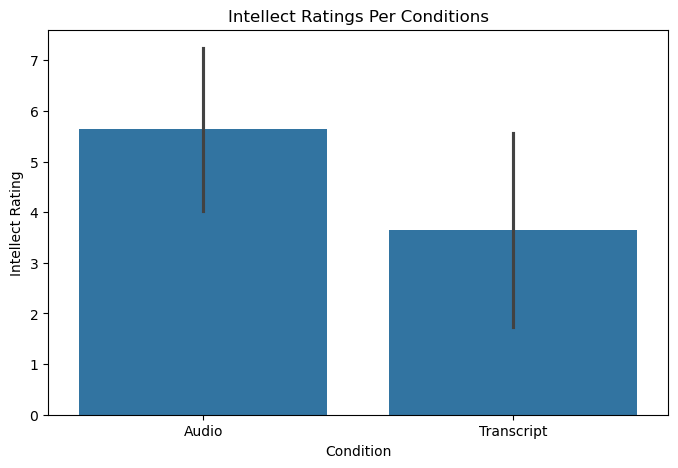

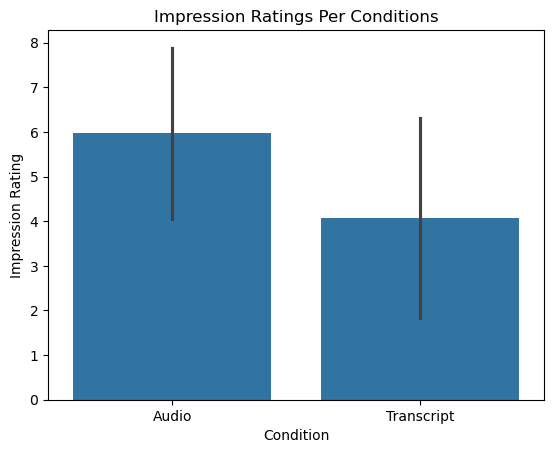

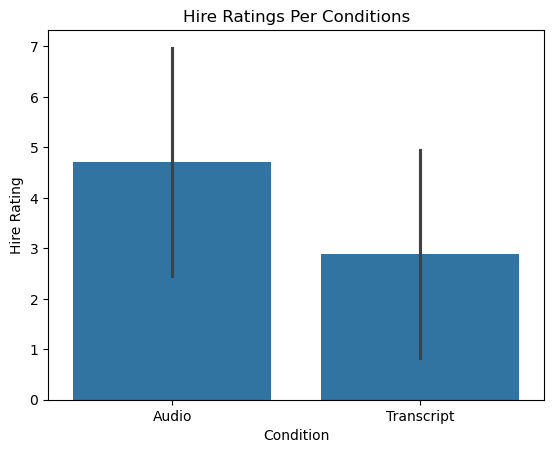

In [34]:
# Intellect_Rating Means
plt.figure(figsize=(8,5)) # Set up the size of the figure
# We will create a bar plot using `seaborn`. 
# It takes in the data, the variable for the x-axis, the variable for the y-axis. We set up te errorbar for you.
# TODO: fill in the code blocks
audio1 = pd.DataFrame({
    'CONDITION': 'Audio', 'Intellect_Rating': audio_group_1.values})
trans1 = pd.DataFrame({
    'CONDITION': 'Transcript', 'Intellect_Rating': trans_group_1.values})
data1 = pd.concat([audio1, trans1])
sns.barplot(data=data1, x='CONDITION', y='Intellect_Rating', errorbar='sd') 


# Every plot should have a nice labelling, including title, axis labels.
# Set up the title, x-axis label, y-axis label for your bar plot.
plt.title('Intellect Ratings Per Conditions') # TODO: fill in the code blocks
plt.xlabel('Condition') # TODO: fill in the code blocks
plt.ylabel('Intellect Rating') # TODO: fill in the code blocks

# Finally, show the plot
plt.show()



# Do the same for the other two variables
# Impression_Rating Means
... # TODO
audio2 = pd.DataFrame({
    'CONDITION': 'Audio', 'Impression_Rating': audio_group_2.values})
trans2 = pd.DataFrame({
    'CONDITION': 'Transcript', 'Impression_Rating': trans_group_2.values})
data2 = pd.concat([audio2, trans2])
sns.barplot(data=data2, x='CONDITION', y='Impression_Rating', errorbar='sd') 
plt.title('Impression Ratings Per Conditions') # TODO: fill in the code blocks
plt.xlabel('Condition') # TODO: fill in the code blocks
plt.ylabel('Impression Rating')

plt.show()
# Hire_Rating Means
... # TODO
audio3 = pd.DataFrame({
    'CONDITION': 'Audio', 'Hire_Rating': audio_group_3.values})
trans_group_3 = pd.DataFrame({
    'CONDITION': 'Transcript', 'Hire_Rating': trans_group_3.values})
data3 = pd.concat([audio3, trans_group_3])
sns.barplot(data=data3, x='CONDITION', y='Hire_Rating', errorbar='sd') 
plt.title('Hire Ratings Per Conditions') # TODO: fill in the code blocks
plt.xlabel('Condition') # TODO: fill in the code blocks
plt.ylabel('Hire Rating')

plt.show()


## Submission

This is the end of the assignment:) Please remember to save your work and submit your assignment in notebook `.ipynb` format on Canvas.